# Fundamentos de Big Data.

## Autor: Victor Simo Lozano

## Actividad 4
<p>Replicar el .ipynb del manual para el Titanic Dataset y contestar las preguntas.</p>
    

<hr style="border-color:red">

<h3>SOLUCION</h3>

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br>
    <p>Replicar codigo del manual.</p>
    </div>

<p style="text-align:left"><b>IMPORTACIONES DE DEPENDENCIAS</b></p>

In [1]:
# Importaciones a nivel global
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importaciones algoritmos de clasificacion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Importacion para evaluación de modelo
from sklearn.metrics import accuracy_score

<p style="text-align:left"><b>Tratamos de entender el problema</b></p>

In [4]:
# https://www.kaggle.com/competitions/titanic

<p style="text-align:left"><b>Obtención de datos</b></p>

In [5]:
df = pd.read_csv('titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p style="text-align:left"><b>Borrar columna PassengerId</b></p>

In [6]:
df=df.drop('PassengerId',axis=1)

<p style="text-align:left"><b>Exploratory Data Analysis (EDA)</b></p>

In [7]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
len(df)

891

In [10]:
df.shape

(891, 11)

In [11]:
# Las columnas que faltan es por ser string sus datos.
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<hr style="border-color:gray">
<p>Conclusiones:<br>
    <li type="disc">Existe columnas con "missing values" (valores que faltan)</li>
</p>

In [12]:
# Numero de columnas con datos faltantes
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [14]:
# Los "nan" significa que no existe ese dato
for cabina in df.Cabin:
    print(cabina)

nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27
nan
nan
nan
B78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D33
nan
B30
C52
nan
nan
nan
nan
nan
B28
C83
nan
nan
nan
F33
nan
nan
nan
nan
nan
nan
nan
nan
F G73
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C23 C25 C27
nan
nan
nan
E31
nan
nan
nan
A5
D10 D12
nan
nan
nan
nan
D26
nan
nan
nan
nan
nan
nan
nan
C110
nan
nan
nan
nan
nan
nan
nan
B58 B60
nan
nan
nan
nan
E101
D26
nan
nan
nan
F E69
nan
nan
nan
nan
nan
nan
nan
D47
C123
nan
B86
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
C2
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E33
nan
nan
nan
B19
nan
nan
nan
A7
nan
nan
C49
nan
nan
nan
nan
nan
F4
nan
A32
nan
nan
nan
nan
nan
nan
nan
F2
B4
B80
nan
nan
nan
nan
nan
nan
nan
nan
nan
G6
nan
nan
nan
A31
nan
nan
nan
nan
nan
D36
nan
nan
D15
nan
nan
nan
nan
nan
C93
nan
nan
nan
nan
nan
C83
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


<p style="text-align:left"><b>Ver el numero aproximado de personas que sobrevivieron</b></p>

In [16]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

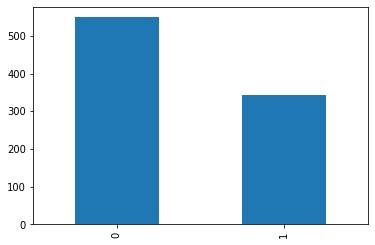

In [17]:
df.Survived.value_counts().plot(kind='bar')
plt.show()

<p style="text-align:left; font-size:20px"><b>¿Cómo seleccionar información concreta de nuestro dataset?</b></p>

<p style="text-align:left"><b>Forma 1:</b></p>

In [18]:
df['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

<p style="text-align:left"><b>Forma 2:</b></p>

In [19]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

<p style="text-align:left"><b>Forma 3:</b></p>

In [20]:
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


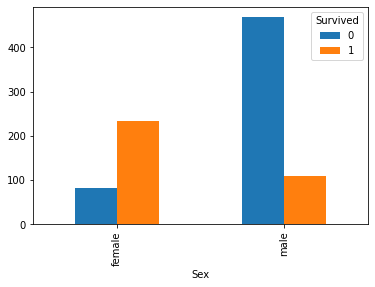

In [21]:
pd.crosstab(df.Sex, df.Survived).plot(kind='bar')
plt.show()

<hr style="border-color:gray">
<p>Conclusiones:<br>
    <li type="disc">La mayoria de mujeres sobrevivieron.</li>
    <li type="disc">La mayoria de hombres no sobrevivieron.</li>
</p>

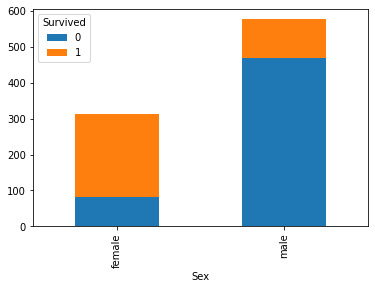

In [22]:
# Otra forma de visualizarlo
pd.crosstab(df.Sex, df.Survived).plot(kind='bar', stacked=True)
plt.show()

<hr style="border-color:gray">
<p>Conclusiones:<br>
    <li type="disc">En esta gráfica se puede ver que había casi el doble de hombres que mujeres.</li>
</p>

In [23]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


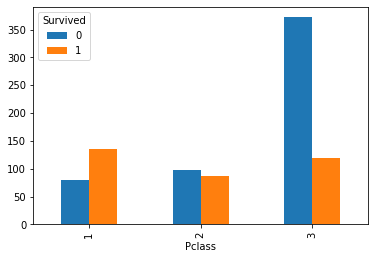

In [24]:
pd.crosstab(df.Pclass, df.Survived).plot(kind='bar')
plt.show()

<hr style="border-color:gray">
<p>Conclusiones:<br>
    <li type="disc">La mayoria de personas de tercera clase no sobrevivió.</li>
</p>

<p style="text-align:left"><b>Forma 5:</b></p>

In [25]:
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

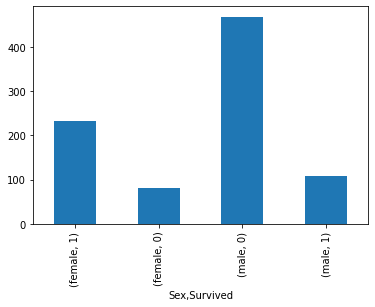

In [26]:
df.groupby('Sex').Survived.value_counts().plot(kind='bar')
plt.show()

<p style="text-align:left"><b>Forma 6:</b></p>

<p>Ejemplo:<br>
    <li type="disc">Selecciono las filas donde Pclass==1.</li>
    <li type="disc">Me creo un dataframe de la misma forma que tenía antes.</li>
</p>

In [27]:
df_sex_uno=df[df.Pclass==1]
df_sex_uno.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [28]:
# Selecciono
df_sex_uno_crosstab=df[df.Pclass==1]['Survived']
df_sex_uno_crosstab

1      1
3      1
6      0
11     1
23     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 216, dtype: int64

<p style="text-align:left; font-size:20px"><b>Ejemplor de creación de dataframes concretos.</b></p>

In [29]:
# Supervivencia a 1 --> Todos sobreviven
df_sobreviven_todos=df[df['Survived']==1]
# Supervivencia a 0 --> Todos los que no sobreviven
df_sobreviven_ninguno=df[df['Survived']==0]
# Supervivencia a 1 - sex = hombre --> Hombres que sobreviven
hombres_supervivientes=df[(df['Survived']==1)&(df['Sex']=='male')]
# Supervivencia a 1 - sex = mujer --> Mujeres que sobreviven
mujeres_supervivientes=df[(df['Survived']==1)&(df['Sex']=='female')]
# Supervivencia a 0 - sex = hombre --> Hombres que NO sobreviven
hombres_no_supervivientes=df[(df['Survived']==0)&(df['Sex']=='male')]
# Supervivencia a 0 - sex = mujer --> Mujeres que NO sobreviven
mujeres_no_supervivientes=df[(df['Survived']==0)&(df['Sex']=='female')]

In [30]:
df_sobreviven_todos.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [31]:
df_sobreviven_todos.Survived.value_counts(3)

1    1.0
Name: Survived, dtype: float64

In [32]:
df_sobreviven_ninguno.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [33]:
hombres_supervivientes.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0,NaN,S
21,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D56,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5,A6,S


In [34]:
mujeres_supervivientes.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [35]:
hombres_no_supervivientes.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [36]:
mujeres_no_supervivientes.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
24,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
38,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
40,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S


<p style="text-align:left; font-size:20px"><b>Obtenemos información de los gráficos.</b></p>

<p style="text-align:left; font-size:15px"><b>Función para hacer gráficas de forma automática.</b></p>

In [37]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


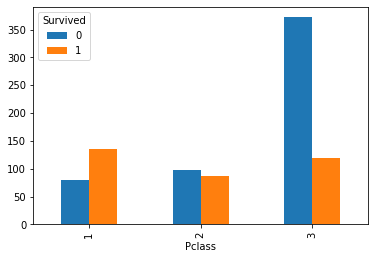

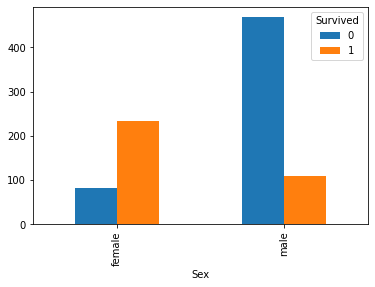

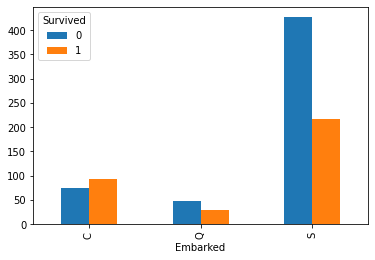

In [38]:
opciones=['Pclass','Sex','Embarked']

for opcion in opciones:
    pd.crosstab(df[opcion], df.Survived).plot(kind='bar')
    plt.show()

<p style="text-align:left; font-size:20px"><b>Algunos gráficos de Seaborn.</b></p>

c:\users\vicsi\onedrive\documentos\py projects\venv\_jupyter\8_bigdata\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\vicsi\onedrive\documentos\py projects\venv\_jupyter\8_bigdata\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\vicsi\onedrive\documentos\py projects\venv\_jupyter\8_bigdata\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


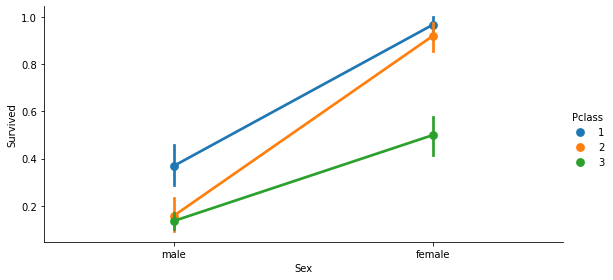

In [39]:
# UserWarning: The `factorplot` function has been renamed to `catplot`
# The original name will be removed in a future release
sns.factorplot('Sex','Survived',hue='Pclass',size=4,aspect=2,legend=True,data=df)
plt.show()

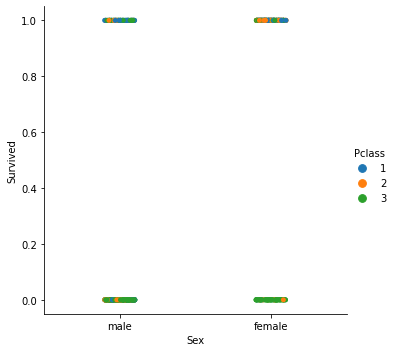

In [40]:
# https://seaborn.pydata.org/generated/seaborn.catplot.html
sns.catplot(x='Sex',y='Survived',hue='Pclass',kind='strip',data=df)
plt.show()

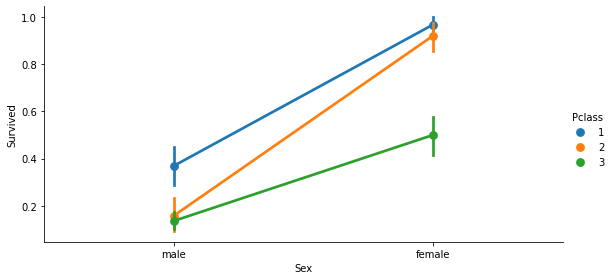

In [41]:
sns.catplot(x='Sex',y='Survived',hue='Pclass',kind='point',height=4,aspect=2,data=df)
plt.show()

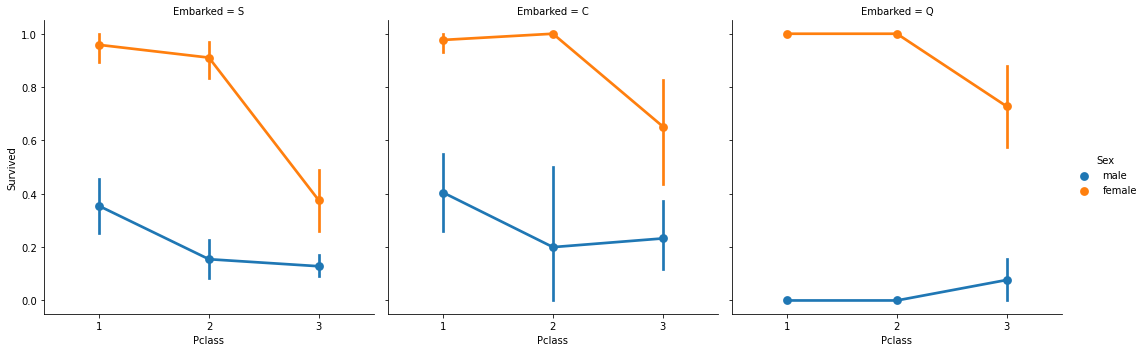

In [42]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',kind='point',data=df)
plt.show()

<hr style="border-color:gray">
<p>Conclusiones:<br>
    <li type="disc">Nos  fijamos en la gráfica de la izquierda, embarked='S'.</li>
    <dd>Las <b>mujeres</b> de <b>3 clase</b> que embarcaron en <b>S</b> fallecieron más en comparación con 1 y 2 clase. Aunque sobrevivieron algo más que los hombres de 1 clase que embarcaron en el mismo muelle.</dd>
    <li type="disc">Los <b>hombres</b> con mayor porcentaje de <b>supervivencia</b> embarcaron en <b>C</b>.</li>
    <li type="disc">Los <b>hombres</b> con menor porcentaje de <b>supervivencia</b> embarcaron en <b>Q</b>.</li>
    <li type="disc">Vemos nuevamente que la maypría de mujeres sobrevivió, pero los hombres no.</li>
</p>

<p style="text-align:left; font-size:20px"><b>Edad y supervivencia.</b></p>

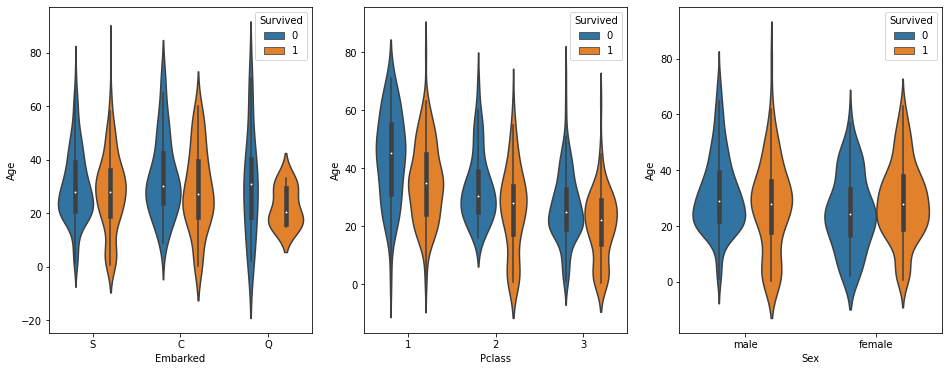

In [43]:
# Crear una figura
fig=plt.figure(figsize=(16,6))
# 3 subplots
# 1 fila 3 columnas - grafica 1
ax1=fig.add_subplot(131)
# 1 fila 3 columnas - grafica 2
ax2=fig.add_subplot(132)
# 1 fila 3 columnas - grafica 3
ax3=fig.add_subplot(133)

# violinplot
sns.violinplot(x='Embarked',y='Age',hue='Survived',data=df,ax=ax1)
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=df,ax=ax2)
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,ax=ax3)

plt.show()

<p style="text-align:left; font-size:15px"><b>Hago un splt=True para más visual.</b></p>

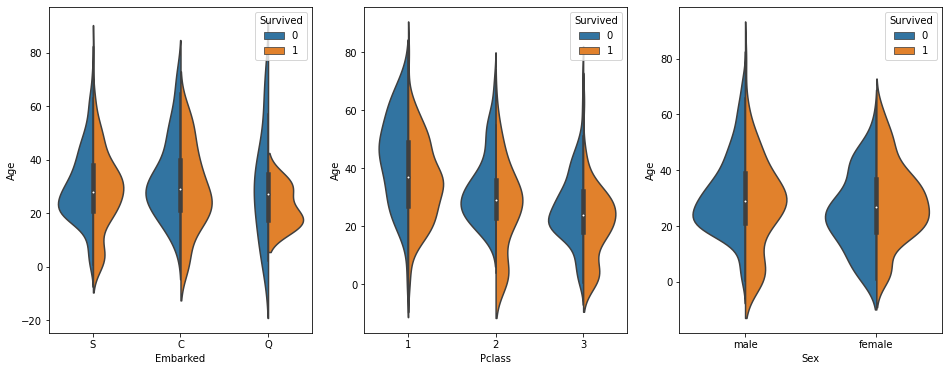

In [44]:
# Crear una figura
fig=plt.figure(figsize=(16,6))
# 3 subplots
# 1 fila 3 columnas - grafica 1
ax1=fig.add_subplot(131)
# 1 fila 3 columnas - grafica 2
ax2=fig.add_subplot(132)
# 1 fila 3 columnas - grafica 3
ax3=fig.add_subplot(133)

# violinplot
sns.violinplot(x='Embarked',y='Age',hue='Survived',data=df,split=True,ax=ax1)
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=df,split=True,ax=ax2)
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,split=True,ax=ax3)

plt.show()

<hr style="border-color:gray">
<p>Conclusiones:<br>
    <b>EMBARKED y Age:</b>
    <li type="disc">La gente de unos 18-35 años de Q SI sobrevivieron mayoritariament.</li>
    <li type="disc">No hay porcentajes mayoritarios significativos en las otras 2 embarcaciones.</li>
    <li type="disc">En Q embarcaron bastantes niños los cuales no sobrevivieron.</li>
    <b>PCLASS y  Age:</b>
    <li type="disc">De la 2ª clase sobre todo y la 3ª sobrevivieron la mayoria de sus niños.</li>
    <b>SEX y Age:</b>
    <li type="disc">Hay más ancianos que ancianas.</li>
    <li type="disc">Los jovenes (varones) menores de 20 años en general sobrevivieron pero no las mujeres.</li>
</p>

In [45]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<p style="text-align:left; font-size:20px"><b>Heatmap.</b></p>

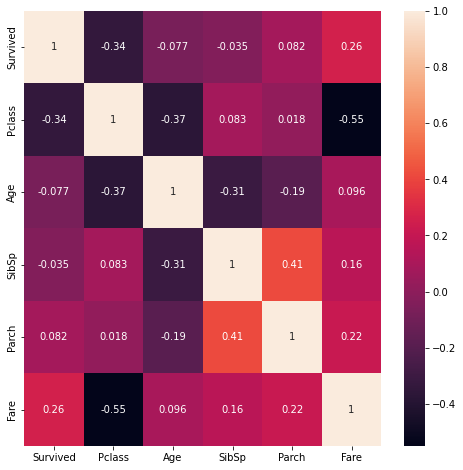

In [46]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

<p style="text-align:left; font-size:20px"><b>Barplot.</b></p>

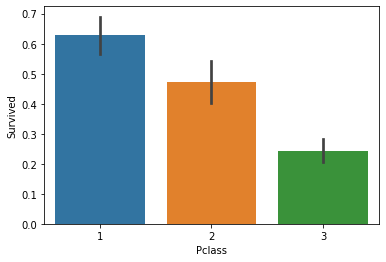

In [47]:
sns.barplot(x='Pclass',y='Survived',data=df)
plt.show()

In [48]:
def funcion_graficas(feat):
    plt.subplot(2,1,1)
    df.groupby(feat).Survived.value_counts().plot(kind='bar')
    plt.figure(figsize=(12,8))
    plt.subplot(2,1,2)
    sns.barplot(x=feat,y='Survived',data=df)
    plt.show()

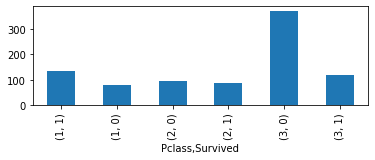

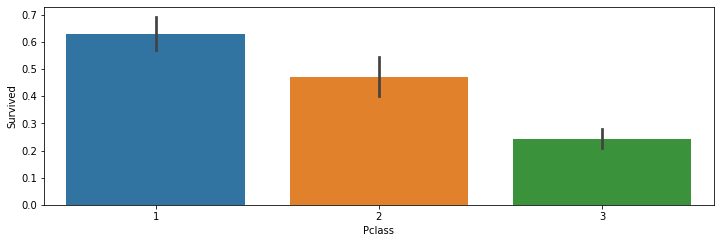

In [49]:
funcion_graficas('Pclass')

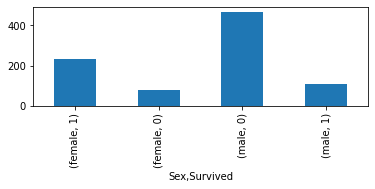

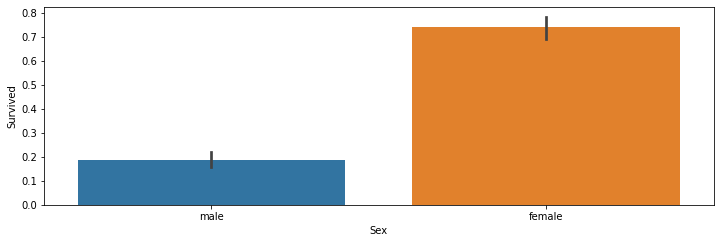

In [50]:
funcion_graficas('Sex')

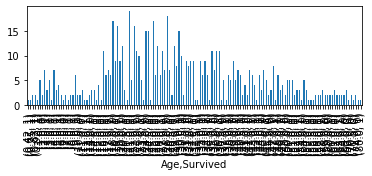

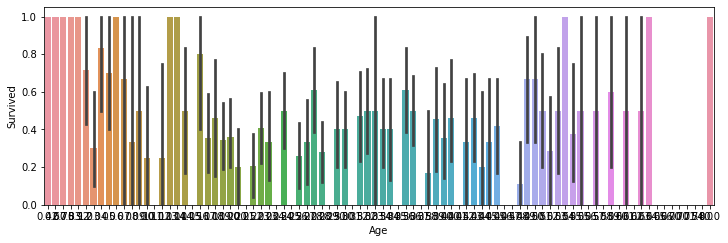

In [51]:
funcion_graficas('Age')

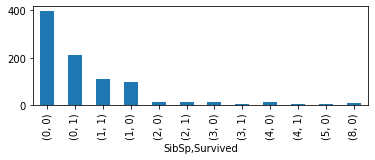

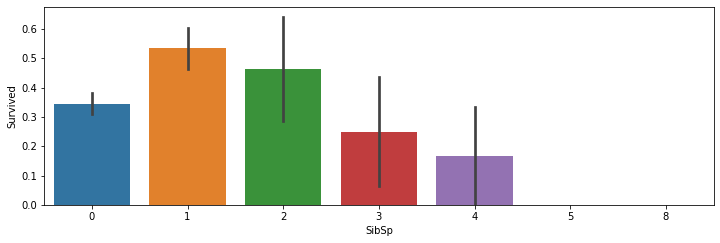

In [52]:
funcion_graficas('SibSp')

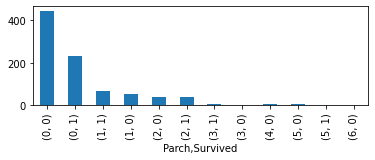

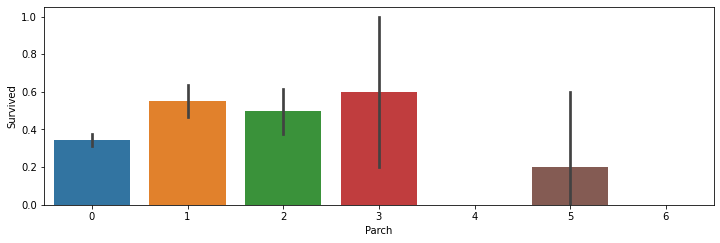

In [53]:
funcion_graficas('Parch')

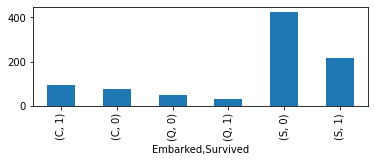

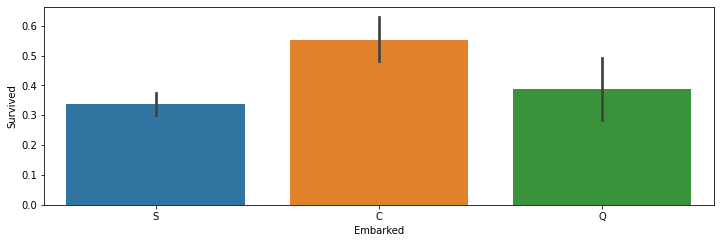

In [54]:
funcion_graficas('Embarked')

<div style="font-size:14px; text-align:justify"><b>SEGUNDA PARTE.-</b><br>
    <p>Contesta a las preguntas.</p>
    </div>

<p style="text-align:left; font-size:15px"><b>Pregunta -1-</b><br>Si estás trabajando con un set de datos y necesitas ver rápidamente la información de una columna con un gráfico. ¿Qué libreria usarías?¿Por qué?</p>

<p style="text-align:left; font-size:15px">Utilizaría la misma librería de <b>Pandas</b> ya que con una linea de codigo podemos imprimir una gráfica. Es la forma más rapida.</p>

<AxesSubplot:>

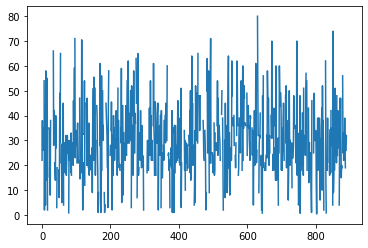

In [55]:
df['Age'].plot()

<p style="text-align:left; font-size:15px"><b>Pregunta -2-</b><br>¿Te parece dificil la forma en que creamos "nuevos Dataframes"?(seleccionando solo ciertas filas o columnas, bajo ciertas condiciones o premisas).</p>

<p style="text-align:left; font-size:15px">No, ya que sigue una forma muy lógica y entendible:<br>nuevo_df=un_df_cualquiera[un_df_cualquiera['columna'] condición ]</p>

<p style="text-align:left; font-size:15px"><b>Pregunta -3-</b><br>Busca algo de información acerca del "heatmap" y explica lo que consideres oportuno con tus palabras.</p>

<p style="text-align:left; font-size:15px">Un gráfico "heatmap" representa de forma gráfica cada valor de una matriz como color. Se puede considerar como si se viese los datos desde arriba, y es por esto que su potencial es para dar una <b>visión general de los datos numéricos.</b></p>
<p style="font-size:12px"><b>Fuente: </b><a href="https://www.data-to-viz.com/graph/heatmap.html">data-to-viz.com</a></p>

<p style="text-align:left; font-size:15px"><b>Pregunta -4-</b><br>¿Se entiende bien cuando usar un "violinplot" o un "factorplot" por ejemplo? ¿Serías capaz de emplearlo en otro set de datos?</p>

<p style="text-align:left; font-size:15px">Si, aunque emplearía en mayor medida el "violinplot" para ver la distribución de las variables numéricas en grupos.</p>